In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.signal import welch

import sys
sys.path.append('../../tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)
sys.path.append('../../tool_code/python_tool_code/frequency_dataset_generation/')

from DataPlot import Data_Load_Plot, Result_Plot, Result_Plot_paper, Loss_Plot
from Scaling import time_scaling, time_inv_scaling
from FFT_func import FFT

Contaminated_data.shape: (10000, 4000)
Clean_data.shape: (10000, 4000)


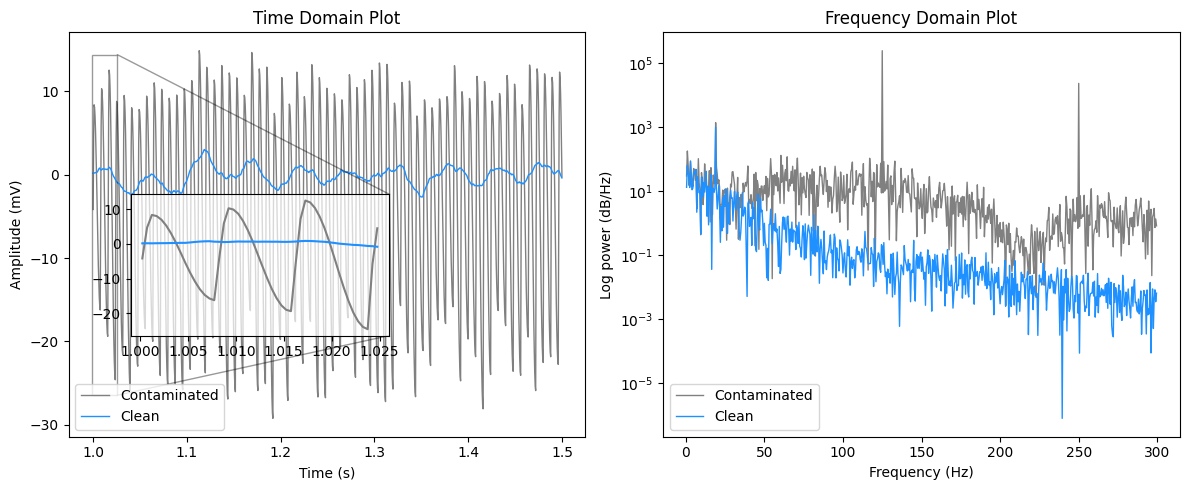

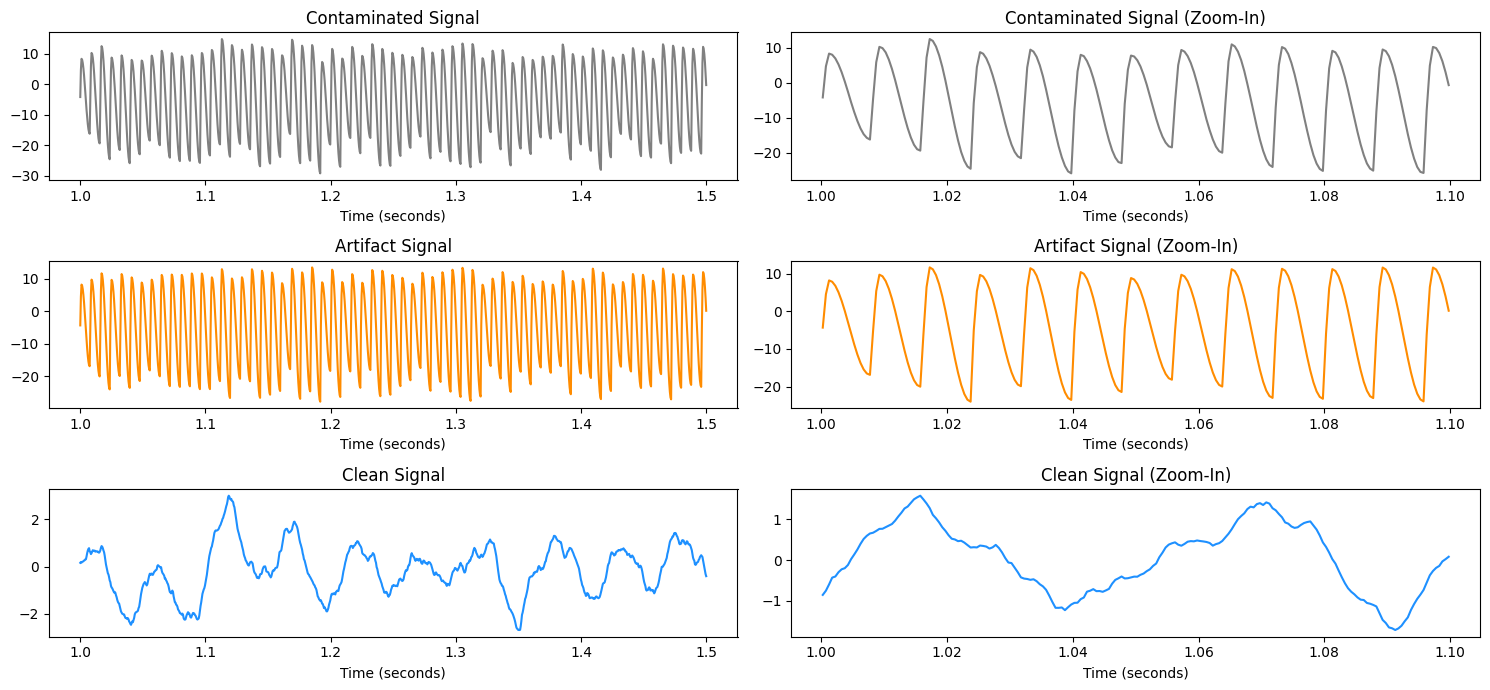

In [2]:
# fpath = "../../data/synthetic_data/"
fpath = 'C:/Users/User/Desktop/SCH/paper_data/'

Contaminated, Clean, Artifact = Data_Load_Plot(fpath)

fs=2000

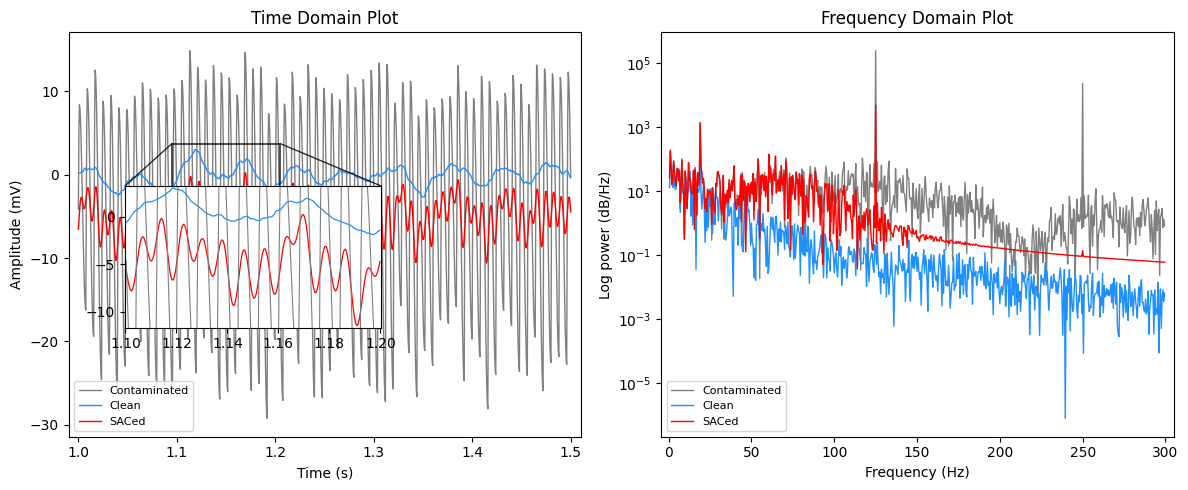

< MSE >
Time Domain MSE: 28.510748071978632 ± 6.23095488007342
Frequency Domain MSE: 20354175.937416065 ± 9633019.417247644


In [3]:
# Low Pass Filter
import numpy as np
from scipy.signal import butter, filtfilt

def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

LPFed = lowpass_filter(Contaminated, 100, fs)

save_path = '../../result/conventional_filter/'
save_title = 'LPF'

Result_Plot(Contaminated, LPFed, Clean) # inverse scaled data를 input으로 넣음

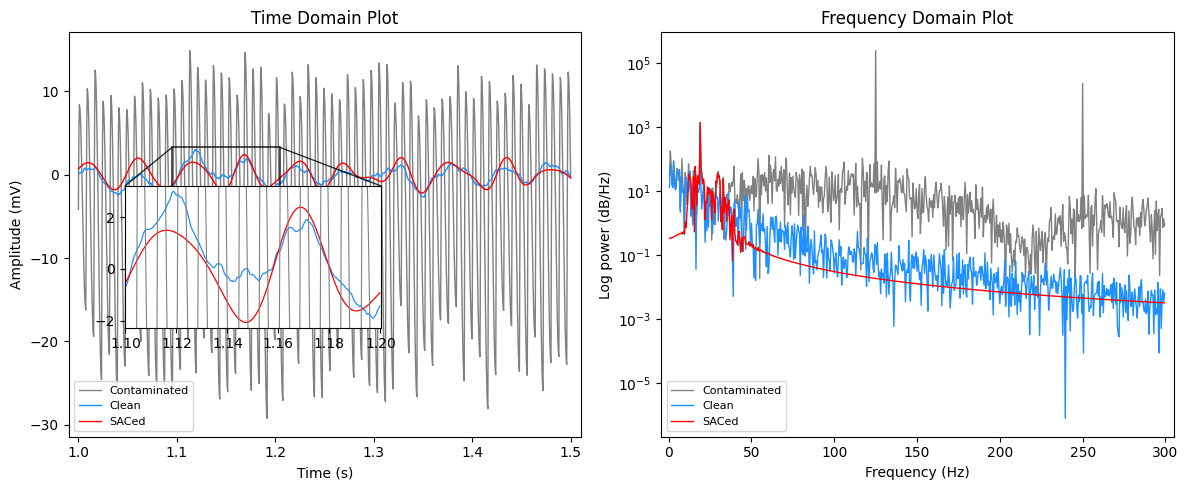

< MSE >
Time Domain MSE: 0.6148883323218123 ± 0.07210427460701052
Frequency Domain MSE: 147.79414619903756 ± 64.2032248382607


In [4]:
# 대역통과 필터 함수 정의
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# 필터 적용
BPFed = bandpass_filter(Contaminated, 12, 35, fs)

save_path = '../../result/conventional_filter/'
save_title = 'BPF'

Result_Plot(Contaminated, BPFed, Clean) # inverse scaled data를 input으로 넣음

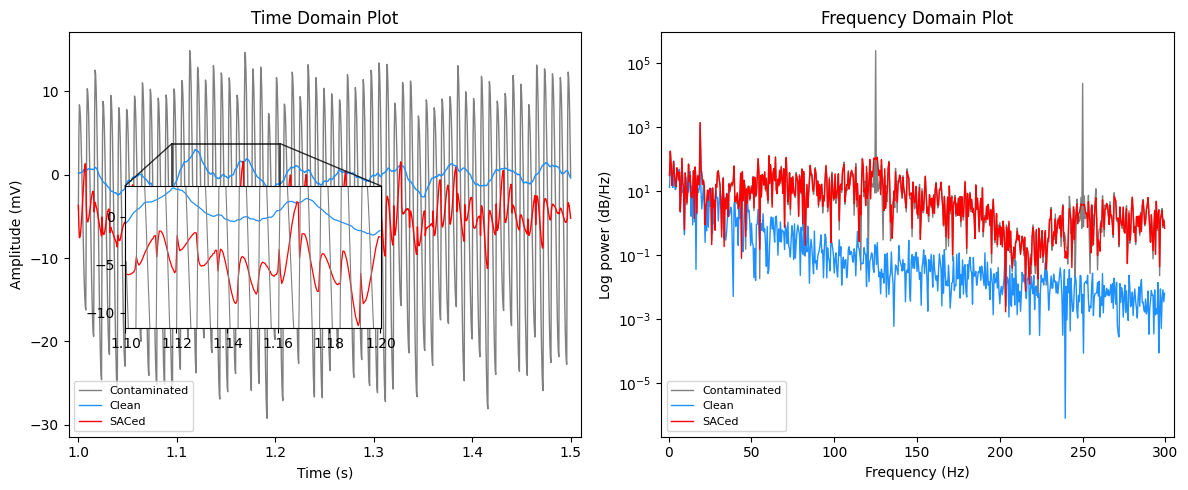

< MSE >
Time Domain MSE: 28.054909042580572 ± 6.13089115870865
Frequency Domain MSE: 20125711.030411843 ± 9524817.972568244


In [6]:
import numpy as np
from scipy.signal import iirnotch, filtfilt

# 노치 필터 설계 및 적용 함수
def notch_filter(data, notch_freqs, fs, quality_factor):
    Notched = data
    for notch_freq in notch_freqs:
        b, a = iirnotch(notch_freq, quality_factor, fs)
        Notched = filtfilt(b, a, Notched)
    return Notched

fundamental_freq = 125
harmonics = [fundamental_freq * i for i in range(1, int(fs/(2*fundamental_freq)) + 1)]  # 130Hz의 배수 계산

quality_factor = 30

Notched = notch_filter(Contaminated, harmonics, fs, quality_factor)

# 결과 Plot
save_path = '../../result/paper/'
save_title = 'Notch'

Result_Plot(Contaminated, Notched, Clean) # inverse scaled data를 input으로 넣음
# Result_Plot_paper(Contaminated, Notched, Clean, save_path, save_title) # inverse scaled data를 input으로 넣음